In [1]:
 %matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

In [4]:
#------- Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
#------- Combine the data into a single dataset
#------- Display the data table for preview
pyber_data = pd.merge(ride_data, city_data, on="city", how="left")
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


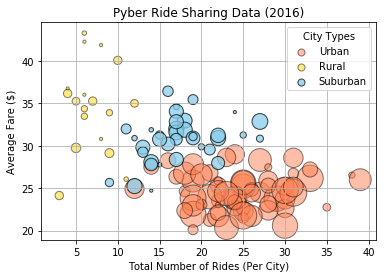

In [7]:
#------- Obtain the x and y coordinates for each of the three city types
#------- Build the scatter plots for each city types
#------- Incorporate the other graph properties
#------- Create a legend
#------- Incorporate a text label regarding circle size
#------- Save Figure

#the city types
#------- City Type (Urban, Suburban, Rural)
urban_ct = pyber_data[pyber_data["type"] == "Urban"].groupby([pyber_data["city"]])
suburban_ct = pyber_data[pyber_data["type"] == "Suburban"].groupby([pyber_data["city"]])
rural_ct = pyber_data[pyber_data["type"] == "Rural"].groupby([pyber_data["city"]])

#defining the x and y's
#urban
ride_urban = urban_ct["ride_id"].count()
fare_urban = urban_ct["fare"].mean()
driver_urban = urban_ct["driver_count"].mean()
#suburban
ride_suburban = suburban_ct["ride_id"].count()
fare_suburban = suburban_ct["fare"].mean()
driver_suburban = suburban_ct["driver_count"].mean()
#rural
ride_rural = rural_ct["ride_id"].count()
fare_rural = rural_ct["fare"].mean()
driver_rural = rural_ct["driver_count"].mean()

#building the scatter plot
#------- You must stick to the Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
#------- When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
plt.scatter(ride_urban, fare_urban, label = "Urban", s=driver_urban * 10, color=["coral"], edgecolor="black", alpha = 0.5, marker="o")
plt.scatter(ride_rural, fare_rural, label = "Rural", s=driver_rural * 10, color=["gold"], edgecolor="black", alpha = 0.5, marker="o")
plt.scatter(ride_suburban, fare_suburban, label = "Suburban", s=driver_suburban  * 10, color=["skyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

#labels for the graph
#------- Average Fare ($) Per City
#------- Total Number of Rides Per City
#------- Total Number of Drivers Per City
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

#legend, or box in the corner
legend = plt.legend(fontsize = 10, title= "City Types", loc="best") 
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

plt.savefig("PyberRideSharingData.png")

plt.show()

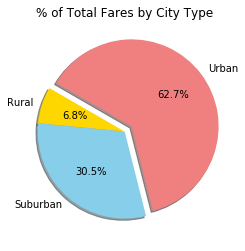

In [8]:
#------- % of Total Fares by City Type
#------- Calculate Type Percents
#------- Build Pie Chart
#------- Save Figure
#------- You must stick to the Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
#------- When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.

citytype_group = pyber_data.groupby(['type'])
fare_sum = citytype_group['fare'].sum()

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")

plt.savefig("PercentageofTotalFaresbyCityType.png")

plt.show()

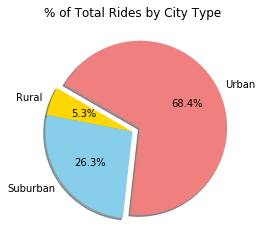

In [9]:
#------- % of Total Rides by City Type
#------- Calculate Ride Percents
#------- Build Pie Chart
#------- Save Figure
#------- You must stick to the Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
#------- When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.

ride_count = citytype_group['ride_id'].count()

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(ride_count, explode=explode, labels=labels, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")

plt.savefig("PercentageofTotalRidesbyCityType.png")

plt.show()

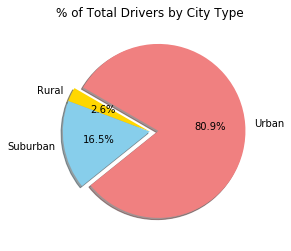

In [10]:
#------- % of Total Drivers by City Type
#------- Calculate Driver Percents
#------- Build Pie Charts
#------- Save Figure
#------- You must stick to the Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
#------- When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.

driver_group = city_data.groupby(['type'])
drivers = driver_group['driver_count'].sum()

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(drivers, explode=explode, labels=labels, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")

plt.savefig("PercentageofTotalDriversbyCityType.png")

plt.show()